# ASTR777 Star and Planet Formation Problem Set 1
## explore the IRAM 30m Orion data cube of 12CO and 13CO from https://www.iram-institute.org/EN/content-page-378-7-158-240-378-0.html

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
# basic modules for reading data and plotting images
from astropy.io import ascii, fits
from astropy.wcs import WCS
from astropy.visualization import (ImageNormalize, MinMaxInterval, SqrtStretch, LogStretch, AsinhStretch)

## read in the data and examine header

In [10]:
# read in the fits file and get some basic information
# see https://docs.astropy.org/en/stable/io/fits/index.html
hdu = fits.open('iram30m/orionA_12co.fits')
hdu.info()

Filename: iram30m/orionA_12co.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   (689, 575, 461)   float32   


In [11]:
# create data array and header
im = hdu[0].data
hd = hdu[0].header

In [12]:
# look at the header
# note its RA-DEC-velocity in deg, deg, m/s
# and units of K for antenna temperature (equivalent to intensity)
print(hd)

SIMPLE  =                    T         /                                        BITPIX  =                  -32         /                                        NAXIS   =                    3         /                                        NAXIS1  =                  689         /                                        NAXIS2  =                  575         /                                        NAXIS3  =                  461         /                                        DATAMIN = -0.1000000305176E+04         /                                        DATAMAX =  0.1113397979736E+03         /                                        BUNIT   = 'K (Ta*)     '               /                                        CTYPE1  = 'RA---GLS    '               /                                        CRVAL1  =  0.8381037499999E+02         /                                        CDELT1  = -0.1482040576252E-02         /                                        CRPIX1  =  0.3455622898947E+03         /

## plot a map of the peak temperature

In [13]:
# get the peak value at each ra-dec position (note that velocity is axis 0 of the python array)
# note that there are nan values so you need to handle these
peak = np.nanmax(im, axis=0)

<ipython-input-13-75482f792d2a>:3: RuntimeWarning: All-NaN slice encountered
  peak = np.nanmax(im, axis=0)


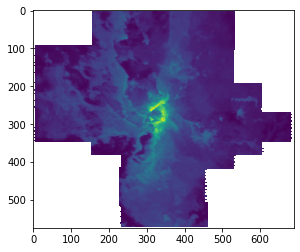

In [14]:
# plot the peak temperature as a 2D map
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(peak)

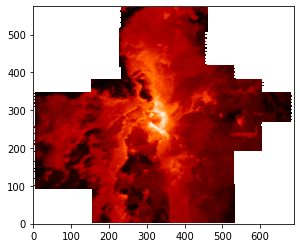

In [16]:
# make the origin in the lower left so that the maps looks more like on the website
# https://www.iram-institute.org/EN/content-page-378-7-158-240-378-0.html
# scale the image on an asinh scale using https://docs.astropy.org/en/stable/visualization/normalization.html
fig = plt.figure()
ax = fig.add_subplot(111)
norm = ImageNormalize(peak, interval=MinMaxInterval(), stretch=AsinhStretch())
ax.imshow(peak, origin='lower', norm=norm, cmap='gist_heat')

## parsing a FITS header to convert from pixels to coordinates

- NAXIS1 = number of pixels along axis 1
- CRVAL1 = value of the reference pixel on axis 1
- CRPIX1 = reference pixel for axis 1
- CDELT1 = pixel scale for axis 1
- CTYPE1 = name of axis 1
- CUNIT1 = unit for axis 1

Coordinate value for axis1 at pixel value i, $x[i] = {\rm CRVAL1} + (i + 1 - {\rm CRPIX1}) * {\rm CDELT1}$ <br>
and the relative value is $\Delta x[i] = (i + 1 - {\rm CRPIX1}) * {\rm CDELT1}$

From https://docs.astropy.org/en/stable/io/fits/index.html <br>
"Note that, like C (and unlike Fortran), Python is 0-indexed and the indices have the slowest axis first and fastest changing axis last; that is, for a 2D image, the fast axis (X-axis) which corresponds to the FITS NAXIS1 keyword, is the second index."

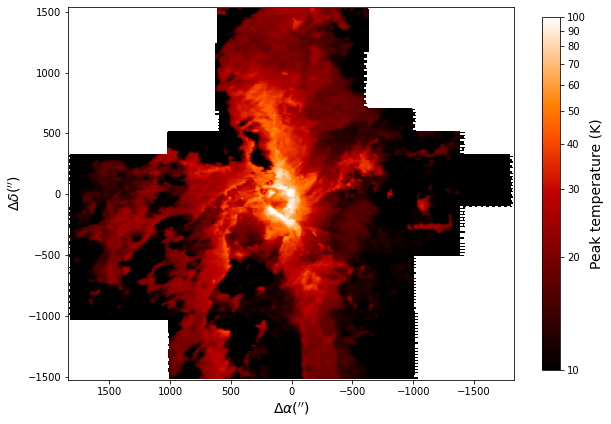

In [18]:
# plot again but now with offset equatorial coordinates rather than pixels
# and create a colorbar for the intensity scale
dra  = (1 + np.arange(hd['NAXIS1']) - hd['CRPIX1']) * hd['CDELT1'] * 3600
ddec = (1 + np.arange(hd['NAXIS2']) - hd['CRPIX2']) * hd['CDELT2'] * 3600
extent =[np.max(dra), np.min(dra), np.min(ddec), np.max(ddec)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
norm = ImageNormalize(peak, vmin=10, vmax=100, stretch=AsinhStretch())
p = ax.imshow(peak, origin='lower', norm=norm, cmap='gist_heat', extent=extent)
ax.set_xlabel(r"$\Delta\alpha ('')$", fontsize=14)
ax.set_ylabel(r"$\Delta\delta ('')$", fontsize=14)

c = plt.colorbar(p, ax=ax, shrink=0.65)
c.set_label('Peak temperature (K)', fontsize=14)

## plot channel maps and write them out to make a movie

In [ ]:
# first define velocity axis (ote that python arrays start at index zero but convention for FITS is to start at 1)
v = function of hd['CRVAL3'], hd['NAXIS3'], hd['CRPIX3'], hd['CDELT3']
# check units

# range of indices (chosen by eye playing around with other image visualization tools)
k0 = 215
k1 = 245
nplot = k1-k0+1

# set up a grid of panels using either plt.subplot or matplotlib gridspec

for n in range(nplot):
    # define ax
    im1 = im[cube_index, :, :]
    norm = ImageNormalize(im1, vmin=, vmax=, stretch=)
    ax.imshow(im1...)
    ax.text(0.02, 0.87, f'{v[cube_index]:6.2f}', fontsize=10, transform = ax.transAxes)

In [ ]:
# make a movie of the channel maps, expanded a bit in range
# I did this by creating a bunch of png and then stitching them together using ffmpeg as a unix command outside the notebook
# but perhaps you can do this using matplotlib animator

## now look at spectra, i.e., temperature vs velocity, and calculate Mach number

In [ ]:
# basic first try 
Tsum = numpy sum of image along the spatial axes
plt.plot(v, Tsum)

In [ ]:
# lots of bad pixels corrupting things
# let's just concentrate on the center - this is a bit of a hack :)
map_region = [-500, 500, -500, 500]
imax = np.where(dra > map_region[0])[0][-1]
imin = np.where(dra < map_region[1])[0][0]
jmin = np.where(ddec > map_region[2])[0][0]
jmax = np.where(ddec < map_region[3])[0][-1]

Tsum = sum of image along the spatial axes between imin:imax, jmin:jmax
Tave = Tsum / (imax-imin) / (jmax-jmin)
plt.plot(v, Tave)
plt.xlim(-5,22)
plt.ylim(-3,30)

In [ ]:
# measure systemic velocity and linewidth
signal = (v > something) & (v < something)
# v_mean = temperature weighted mean of v within signal region
# v_sigma = temperature weighted standard deviation of v within signal region
print(f'Mean velocity = {v_mean:5.2f} km/s')
print(f'FWHM = {2.355*v_sigma:5.2f} km/s')

In [ ]:
# compare with thermal linewidth
from astropy import units as u
from astropy import constants as c
T_kin = 10 * u.K
v_thermal = some function of T and mass with fundamental constants
print(f'Thermal velocity dispersion = {v_thermal.si:5.2f}')

In [ ]:
# Mach number of cloud
M = v_sigma / (v_thermal.si.value/1000)
print(f'Mach number = {M:5.2f}')

## calculate virial mass

In [ ]:
dist = 412        # distance to Trapezium Cluster in pc
R =               # "radius" of the region over which we measured the spectrum in au
Mvir = some function of R, v_sigma, and G
print(f'Virial mass = {int((Mvir/c.M_sun).decompose()):5d} solar masses')